# PROJECT_MOD2_LINEAR REGRESSION

### 1. DATA PREPROCESSING

### 1.1 Import Libraries

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import gc; gc.enable()

import warnings
warnings.filterwarnings("ignore")

In [141]:
from pyearth import Earth

from pygam import LinearGAM
from pygam import GAM
from pygam.terms import s as spline
from pygam.terms import f as factor
from pygam.terms import te as tensor

### 1.2. Read in Data

In [142]:
df = pd.read_csv('kc_house_data.csv')

In [143]:
df.head().append(df.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [145]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [146]:
print(df.columns.to_list())

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


### 1.3. Data Cleaning

### a) Column 'date'

In [147]:
### convert 'date of sale' column to 'datetime' type
df['date'] = pd.to_datetime(df.date) 

# split column with years values only
df['year_sale'] = df['date'].dt.year # year sale
df['month_sale'] = df['date'].dt.month # month sale

In [148]:
# df[['date','year_sale','month_sale']].head()

In [149]:
# drop 'date' column
df.drop(columns = ['date'], inplace= True)

### b) Column 'sqft_basement'

In [150]:
### 'sqft_basement' column is object type, check content
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
248.0         1
2500.0        1
2400.0        1
2600.0        1
704.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [151]:
# convert to integer type, '?' will be converted to NaN
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [152]:
# get median, mean for sqft_basement
df['sqft_basement'].agg(['median', 'mean'])

median      0.000000
mean      291.851724
Name: sqft_basement, dtype: float64

In [153]:
# replace Nan values with median=0
df['sqft_basement'].fillna(value = df['sqft_basement'].median(),inplace=True)

### c) Column 'id'. Check for duplicates

In [154]:
df.duplicated().sum()

0

In [155]:
### Check for duplicates by 'id' columns
df.id.value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [156]:
# check first id, house sold 3 times
df.loc[df.id == 795000620]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
17588,795000620,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,...,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,2014,9
17589,795000620,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,...,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,2014,12
17590,795000620,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,2,...,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250,2015,3


In [157]:
# it was decided not to remove, as each deal corresponds to different date of sale

### d) Column 'bedrooms'.

In [158]:
# check bedrooms columns
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [159]:
# look closer for bedrroms >= 10
df.loc[df['bedrooms'] >= 10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
8748,1773100755,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,...,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,2014,8
13301,627300145,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,...,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,2014,8
15147,5566100170,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,...,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914,2014,10
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,...,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,2014,6
19239,8812401450,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,...,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,2014,12


In [160]:
# drop row with 33 bedrooms. not matching per tot. sq.ft
df.drop(index=15856,inplace = True)

### e) Column 'waterfront'.

In [161]:
# check 'waterfront' column
df['waterfront'].value_counts()

0.0    19074
1.0      146
Name: waterfront, dtype: int64

In [162]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [163]:
# replace NAN with median=0
df['waterfront'].fillna(value = df['waterfront'].median(),inplace=True)

In [164]:
# verify 'waterfront' by value_counts()
df['waterfront'].value_counts()

0.0    21450
1.0      146
Name: waterfront, dtype: int64

### f) Column 'view'.

In [165]:
# check values in 'view' column
df['view'].value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [166]:
#replace Nan values with median = 0
df['view'].fillna(value = df['view'].median(),inplace=True)

In [167]:
# verify 'view' by value_counts()
df['view'].value_counts()

0.0    19484
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### g) Column 'yr_renovated'. 

In [168]:
# check 'yr_renovated' column
df['yr_renovated'].value_counts()

0.0       17010
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [169]:
#replace Nan values with median = 0
df['yr_renovated'].fillna(value = df['yr_renovated'].median(),inplace=True)

In [170]:
# verify 'yr_renovated' by value_counts()
df['yr_renovated'].value_counts()

0.0       20852
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [171]:
### better to drop 'yr_renovated' as majority is missing.
# also drop'id' column
df.drop(columns=['id','yr_renovated'],inplace = True)

In [172]:
# final check for nan values
# df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
view             21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
year_sale        21596 non-null int64
month_sale       21596 non-null int64
dtypes: float64(8), int64(12)
memory usage: 3.5 MB


### h) Target Column 'price'. 

In [173]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233191,3.409752,7.657946,1788.631506,285.702954,1971.000787,98077.950685,47.560087,-122.213977,1986.650722,12758.656649,2014.322976,6.573995
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.764689,0.650471,1.173218,827.763251,439.825454,29.375460,53.514040,0.138552,0.140725,685.231768,27275.018316,0.467625,3.115131
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


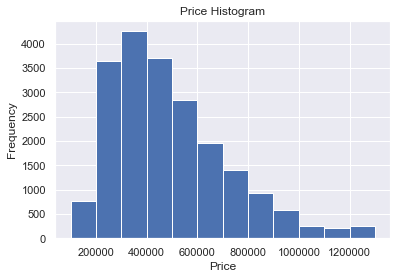

In [174]:
### plot 'price' histogram
bins = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]) * 1000
plt.hist(x=df['price'],bins=bins)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.show()

### i) check multicollinearity 


In [37]:
used_cols = [c for c in df.columns.tolist() if c not in ['price']]
X, y = df[used_cols], df['price']

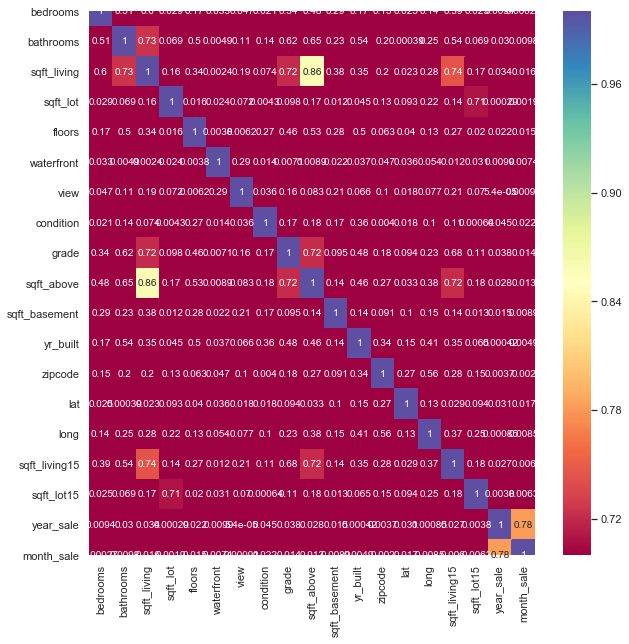

In [175]:
# check multicollinearity
plt.figure(figsize=(10,10))

sns.heatmap(X.corr().abs(), cmap = "Spectral", annot = True, vmin=0.7)


In [39]:
### there are some collinearity between [sqft_living] and 
# ['sqft_above','grade','bathrooms','sqft_lot15', 'sqft_living15']

### [sqft_lot] colliniear with [sqft_lot_15]

###  [yr_sale] with [month_sale]

In [177]:
print(df.columns.tolist())

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sale', 'month_sale']


In [178]:
#All features
used_cols = [c for c in df.columns.tolist() if c not in ['price']]
X, y = df[used_cols], df['price']

#lets create used_cols_reduced with some of the features dropped
used_cols_red = ['bedrooms', 'bathrooms', 'sqft_living', 
                 'sqft_lot', 'floors', 'waterfront', 'view', 
                 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 
                 'zipcode', 'lat', 'long','month_sale']
X_red = df[used_cols_red]

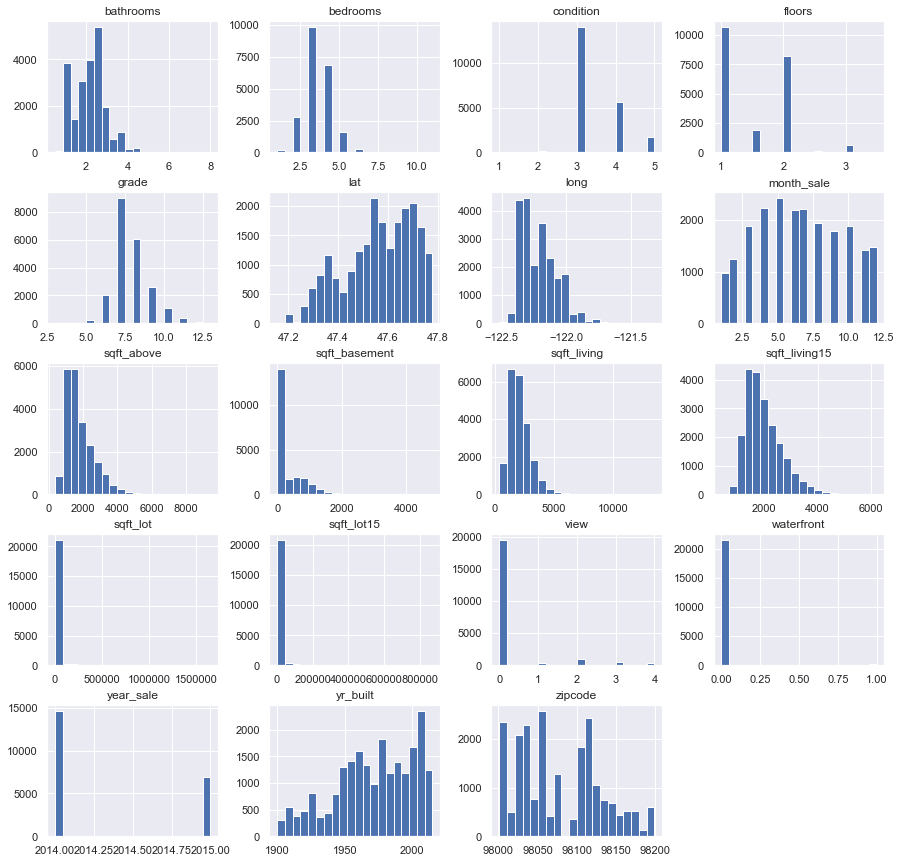

In [52]:
df[used_cols].hist(figsize  = [15, 15],bins=20) 
plt.show()

In [60]:
# # lets log transform some of the features
# used_cols_trf = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
#                     'floors', 'waterfront', 'view', 'condition', 'grade',
#                     'sqft_above', 'sqft_basement', 'yr_built', 
#                     'zipcode', 'lat', 'long', 
#                     'sqft_living15', 'sqft_lot15', 'year_sale', 'month_sale']
# df_trf = df[used_cols_trf].copy()

In [67]:
# df_trf['yr_built'] = np.log(df_trf['yr_built'])

### 2. BASELINE MODEL - Linear Regression

### 2a) Helper Functions 

In [225]:
### Code Source: Notebook from lecture
# Quick helper functions
def model_evaluate(old_pipe, bagging=True):
    if bagging:
        pipe = BaggingRegressor(old_pipe, n_estimators=3)
    else:
        pipe = old_pipe
        
    metrics = ['r2', 
               'neg_mean_absolute_error', 
               'neg_mean_squared_error']
    
    # cross validate returns a dictionary object
    # * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    preds = cross_validate(pipe, X, y, 
                           cv=4, n_jobs=-1, 
                           scoring=metrics,
                           return_estimator=True)

    print("-"*60)
    for i, tag in enumerate(preds):
        if 'time' not in tag and 'estimator' not in tag:
            print(tag, ":\n\t\t\t\t\t", 
                  "%.4f" % preds[tag].mean(), 
                  "+/-", 
                  "%.4f" % preds[tag].std())
            if i % 2 == 0:
                print()
                print("-"*60)
                
    if bagging:
        coeffs = []
        for i in range(3):
            for j in range(3):
                estimator = preds['estimator'][i].estimators_[j]
                modeling_step = estimator.steps[1][0]
                coef = estimator.named_steps[modeling_step].coef_
                coeffs.append(coef)

        coeffs = [(
            "Beta_%s" % (i+1), 
            "%.4f" % np.mean(coeffs, axis=0)[i],
            "%.4f" % np.std(coeffs, axis=0)[i],
        ) for i in range(len(used_cols))]
        for coeff in coeffs:
            print(coeff[0], ":\t", coeff[1], "+/-", coeff[2])

        print()
        print("-"*60)
        
    return preds['estimator'] # this is a list of pipelines


def model_predict(pipe):
    y_preds = [pipe[i].predict(X) for i in range(len(pipe))]
    y_pred = np.mean(y_preds, axis=0)
    return y_pred


def plot_residuals():
    SIZE = (8,8)
    
    # plot y vs y_pred
    plt.figure(figsize=SIZE)
    plt.scatter(y,y_pred, color = 'green')
    plt.plot([0, y.max()],[0,y.max()], label = 'y = y_pred')
    plt.legend()
    plt.xlabel('y: Price')
    plt.ylabel('y_pred: Predcited Price')
    plt.title('Price vs Predicted Price')
    plt.show()
    
    #  plot residual histogram
    plt.figure(figsize=SIZE)
    plt.hist(y - y_pred, histtype = 'bar', range = (-500000, 500000),bins = 20)
    
    plt.ylim(0,7000)
    plt.xlim(-500000, 500000)
    plt.xlabel('y - y_pred')
    plt.ylabel('Frequency')
    plt.title('Residual Histogram')
    plt.show()

  
    
    

### 2b) Baseline : Linear (OLS) Regression with all features

In [118]:
scaler = RobustScaler()
lr = LinearRegression()
pipe_base_1 = make_pipeline(scaler, lr)

pipe_base_1 = model_evaluate(pipe_base_1) # returns a list of pipelines
y_pred = model_predict(pipe_base_1)

------------------------------------------------------------
test_r2 :
					 0.6969 +/- 0.0075
test_neg_mean_absolute_error :
					 -126544.2204 +/- 2895.5149

------------------------------------------------------------
test_neg_mean_squared_error :
					 -40895277805.7739 +/- 2855911725.1591
Beta_1 :	 -40423.6784 +/- 4865.4500
Beta_2 :	 34338.4811 +/- 6053.6345
Beta_3 :	 123062.6010 +/- 48549.4816
Beta_4 :	 710.0723 +/- 471.7056
Beta_5 :	 11432.7410 +/- 7866.4279
Beta_6 :	 602024.3276 +/- 80254.8938
Beta_7 :	 54572.3452 +/- 5813.0703
Beta_8 :	 26752.7744 +/- 3009.9623
Beta_9 :	 98695.5652 +/- 2935.0385
Beta_10 :	 74768.6835 +/- 42595.4661
Beta_11 :	 25211.5011 +/- 20743.2449
Beta_12 :	 -127352.2123 +/- 5317.2342
Beta_13 :	 -49348.1563 +/- 2509.3929
Beta_14 :	 123559.7040 +/- 1297.4090
Beta_15 :	 -44015.7572 +/- 3170.4141
Beta_16 :	 16039.2156 +/- 9203.4229
Beta_17 :	 -1939.0114 +/- 730.6343
Beta_18 :	 39950.2873 +/- 6679.8279
Beta_19 :	 8400.6689 +/- 3956.0227

----------------------

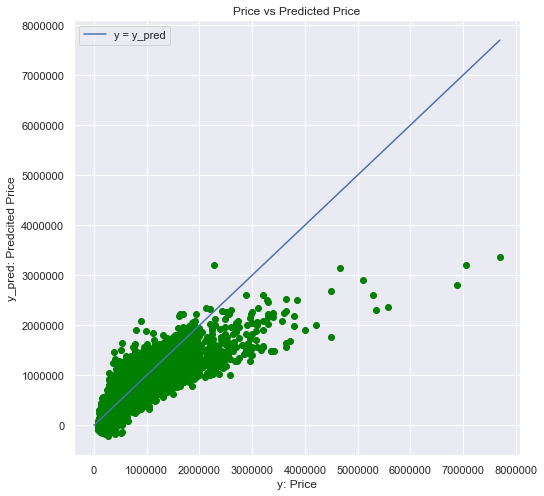

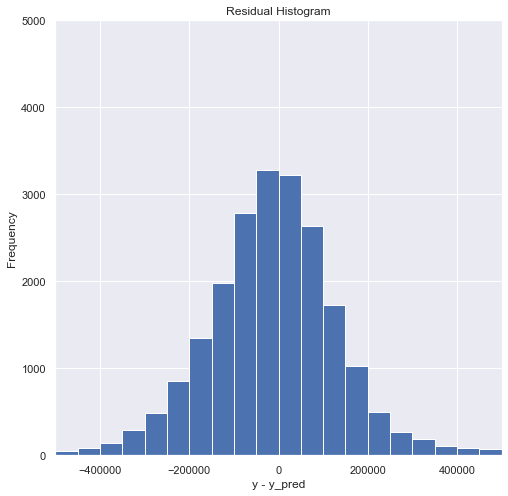

In [123]:
plot_residuals()

In [126]:
# Observations:
# 1) the base model has r2 close to 0.7. 
# 2) the mean absolute and RMSE are above 100k. Which is clear from residual histogram.
# 3) Prediction prices of 1.2mln and above is quite bad.

### 2c) Baseline : Linear (OLS) Regression with reduced features

In [179]:
used_cols = used_cols_red
X = X_red

scaler = RobustScaler()
lr = LinearRegression()
pipe_base_2 = make_pipeline(scaler, lr)

pipe_base_2 = model_evaluate(pipe_base_2) # returns a list of pipelines
y_pred = model_predict(pipe_base_2)

------------------------------------------------------------
test_r2 :
					 0.6615 +/- 0.0067
test_neg_mean_absolute_error :
					 -136383.9332 +/- 3846.6043

------------------------------------------------------------
test_neg_mean_squared_error :
					 -45649930814.3144 +/- 2819429286.0388
Beta_1 :	 -53396.6092 +/- 4500.1574
Beta_2 :	 43621.3749 +/- 3461.8881
Beta_3 :	 158297.2648 +/- 25034.6892
Beta_4 :	 -329.3613 +/- 288.3534
Beta_5 :	 20233.5851 +/- 2528.4842
Beta_6 :	 520243.8275 +/- 76710.5070
Beta_7 :	 71802.3449 +/- 4437.4849
Beta_8 :	 24863.1119 +/- 2003.4659
Beta_9 :	 150900.4859 +/- 24824.7370
Beta_10 :	 38411.1034 +/- 8044.5943
Beta_11 :	 -93015.7167 +/- 4676.9310
Beta_12 :	 -60699.0107 +/- 3273.4660
Beta_13 :	 145026.3849 +/- 3504.5258
Beta_14 :	 -60550.5746 +/- 4103.1695
Beta_15 :	 -15978.1312 +/- 2973.7680

------------------------------------------------------------


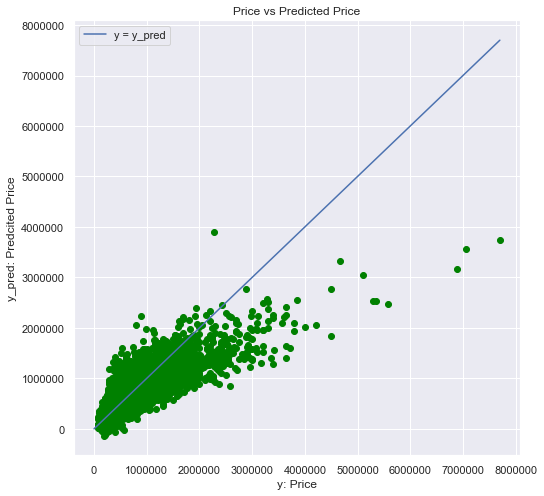

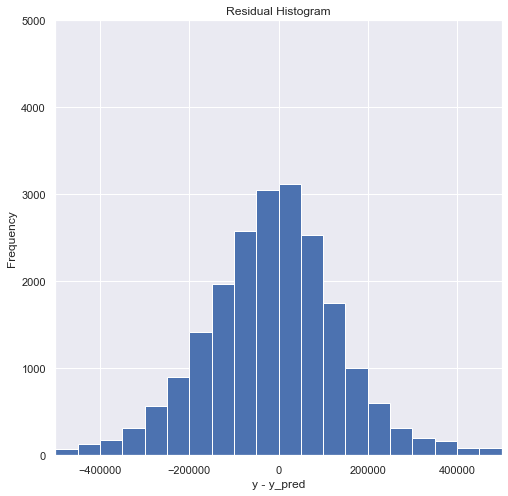

In [180]:
plot_residuals()

In [161]:
# Observations:
# 1) result quite similar to base model with all features
# 2) r2, rmse, mae metrics are not improved

In [132]:
# 3) As we can see majority of the data is within 1.3 mln. 
print('Price below $1.3mln:', len(df.loc[df['price']<=1.3*10**6]))
print('All data           :', len(df))

Price below $1.3mln: 20822
All data           : 21596


### 2d) Check if base model could improve with price range below $1.3 mln.

In [133]:
# Adjusted DF with price range below 1.3mln.
df_adj = df.loc[df['price']<=1.3*10**6]

In [137]:
used_cols = [c for c in df_adj.columns.tolist() if c not in ['price']]
X, y = df_adj[used_cols], df_adj['price']
   
scaler = RobustScaler()
lr = LinearRegression()
pipe_test = make_pipeline(scaler, lr)

pipe_test = model_evaluate(pipe_test) # returns a list of pipelines
y_pred = model_predict(pipe_test)

------------------------------------------------------------
test_r2 :
					 0.7050 +/- 0.0059
test_neg_mean_absolute_error :
					 -92200.5244 +/- 886.2232

------------------------------------------------------------
test_neg_mean_squared_error :
					 -15402895020.0096 +/- 330460936.8811
Beta_1 :	 -12119.3776 +/- 1438.1713
Beta_2 :	 24406.9699 +/- 3999.0343
Beta_3 :	 67473.2377 +/- 6813.3950
Beta_4 :	 1019.9171 +/- 181.5701
Beta_5 :	 33399.6856 +/- 2943.1095
Beta_6 :	 180728.0689 +/- 35861.0614
Beta_7 :	 35184.6513 +/- 2623.8872
Beta_8 :	 27149.9081 +/- 1505.2050
Beta_9 :	 78627.1819 +/- 817.0224
Beta_10 :	 16974.8448 +/- 6512.5946
Beta_11 :	 9051.5595 +/- 2888.9345
Beta_12 :	 -89950.9920 +/- 4144.4884
Beta_13 :	 -21267.1876 +/- 2354.6068
Beta_14 :	 120056.3603 +/- 2022.1761
Beta_15 :	 -15982.8625 +/- 1822.0187
Beta_16 :	 40890.3524 +/- 2683.6648
Beta_17 :	 -716.9433 +/- 187.5003
Beta_18 :	 23504.8224 +/- 3306.1807
Beta_19 :	 2052.1133 +/- 2219.3173

--------------------------------

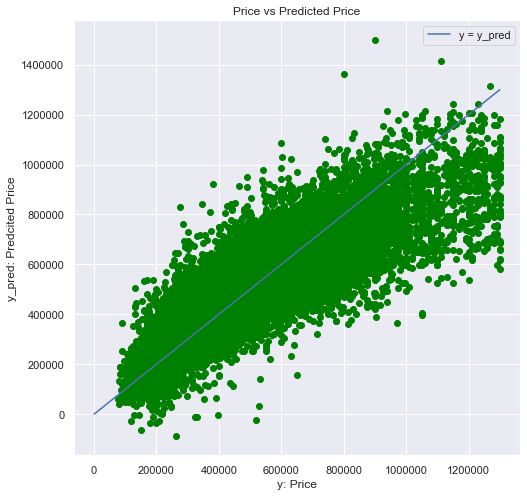

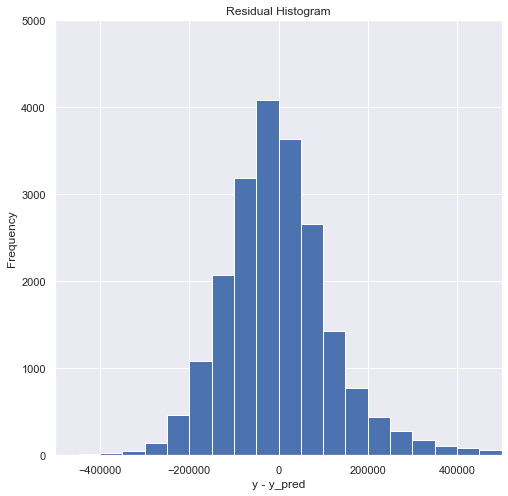

In [138]:
plot_residuals()

In [139]:
# Observations:
# 1) metrics for this base model improved
# 2) need to try this model with reduced number of features

### 2d) Base model with price range below $1.3 mln and with reduced features.

In [181]:
#lets create used_cols_reduced with some of the features dropped
used_cols_red = ['bedrooms', 'bathrooms', 'sqft_living', 
                 'sqft_lot', 'floors', 'waterfront', 'view', 
                 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 
                 'zipcode', 'lat', 'long','month_sale']
used_cols = used_cols_red
X, y = df_adj[used_cols], df_adj['price']

In [183]:
scaler = RobustScaler()
lr = LinearRegression()
pipe_base4 = make_pipeline(scaler, lr)

pipe_base4 = model_evaluate(pipe_base4) # returns a list of pipelines
y_pred = model_predict(pipe_base4)

------------------------------------------------------------
test_r2 :
					 0.6372 +/- 0.0055
test_neg_mean_absolute_error :
					 -101899.0637 +/- 1572.0262

------------------------------------------------------------
test_neg_mean_squared_error :
					 -18943853668.9864 +/- 429040708.8319
Beta_1 :	 -25578.1555 +/- 1430.0894
Beta_2 :	 32996.9126 +/- 5759.9322
Beta_3 :	 129932.2529 +/- 19527.5138
Beta_4 :	 589.3548 +/- 282.0462
Beta_5 :	 37410.8451 +/- 2735.5763
Beta_6 :	 124727.9403 +/- 34982.6710
Beta_7 :	 49866.9646 +/- 2751.6734
Beta_8 :	 25331.4750 +/- 2222.2962
Beta_9 :	 64270.2242 +/- 18954.2220
Beta_10 :	 11776.2170 +/- 10194.5331
Beta_11 :	 -60137.1485 +/- 2038.8351
Beta_12 :	 -31633.1865 +/- 2057.4062
Beta_13 :	 139917.3599 +/- 1856.0433
Beta_14 :	 -23738.6020 +/- 1800.8435
Beta_15 :	 -11725.3487 +/- 3137.6870

------------------------------------------------------------


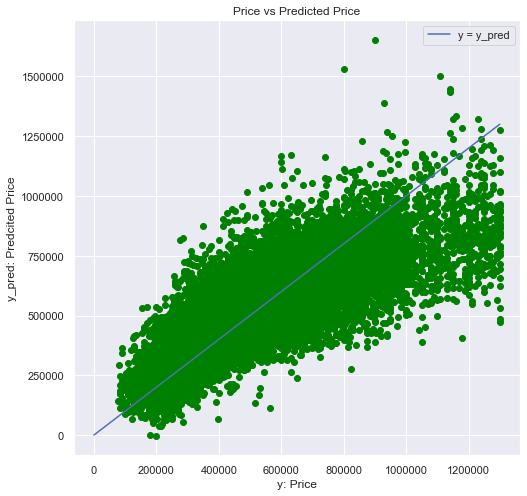

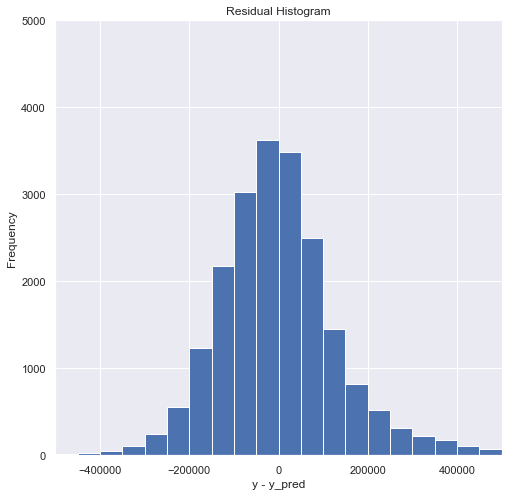

In [186]:
plot_residuals()

In [185]:
# Observations:
# 1) metrics for base model with reduced features show worse results than with all feartured.

### 3. Additive Models (Linear Models + New Bases)

### 3a. MARS (Multivariate Adaptive Regression Splines)

In [ ]:
# #All features
# used_cols = [c for c in df.columns.tolist() if c not in ['price']]
# X, y = df[used_cols], df['price']

# #lets create used_cols_reduced with some of the features dropped
# used_cols_red = ['bedrooms', 'bathrooms', 'sqft_living', 
#                  'sqft_lot', 'floors', 'waterfront', 'view', 
#                  'condition', 'sqft_above', 'sqft_basement', 'yr_built', 
#                  'zipcode', 'lat', 'long','year_sale']
# X_red = df[used_cols_red]

### MARS with one DoF (with price range below $1.3 mln and all features)

In [187]:
#All features
used_cols = [c for c in df_adj.columns.tolist() if c not in ['price']]
X, y = df_adj[used_cols], df_adj['price']

In [189]:
criteria = ('rss', 'nb_subsets')
mars1 = Earth(max_degree=1,
             feature_importance_type=criteria)
pipe_mars1 = make_pipeline(scaler, mars1)
pipe_mars1 = model_evaluate(pipe_mars1, bagging=False)
y_pred = model_predict(pipe_mars1)

------------------------------------------------------------
test_r2 :
					 0.7201 +/- 0.0059
test_neg_mean_absolute_error :
					 -89592.6978 +/- 898.6336

------------------------------------------------------------
test_neg_mean_squared_error :
					 -14614112664.0507 +/- 423914268.6435


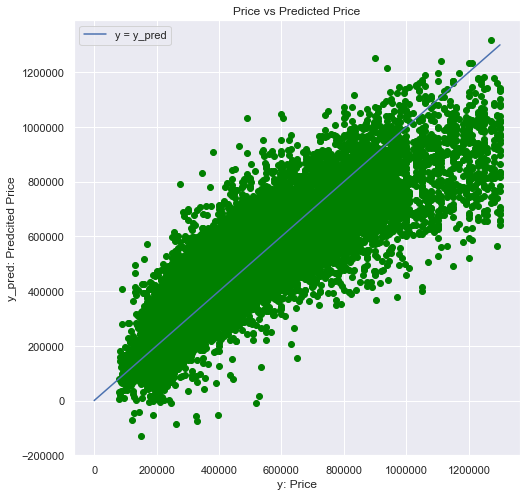

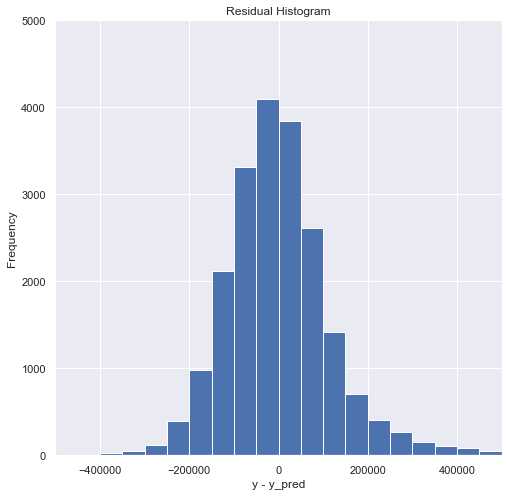

In [190]:
plot_residuals()

In [191]:
mars1.fit(X,y)
print(mars1.summary())
print(mars1.summary_feature_importances(sort_by='nb_subsets'))

Earth Model
-------------------------------------------
Basis Function       Pruned  Coefficient   
-------------------------------------------
(Intercept)          No      -1.39285e+07  
grade                No      82469.8       
h(lat-47.2416)       No      546570        
h(47.2416-lat)       No      604510        
h(sqft_living-4980)  Yes     None          
h(4980-sqft_living)  No      -83.2015      
yr_built             No      -1909.51      
view                 No      36096.3       
h(sqft_lot-8821)     No      0.236896      
h(8821-sqft_lot)     No      3.58799       
sqft_living15        No      57.0371       
condition            No      27775.2       
zipcode              No      -260.308      
waterfront           No      211752        
year_sale            No      21363.2       
h(sqft_lot15-9405)   No      11.9788       
h(9405-sqft_lot15)   Yes     None          
h(bathrooms-5)       No      -89841.9      
h(5-bathrooms)       No      -18047.2      
h(sqft_lot15-3937)  

### MARS with one DoF (with price range below $1.3 mln and reduced features)

In [192]:
#lets use used_cols_reduced with some of the features dropped
used_cols = used_cols_red
X, y = df_adj[used_cols], df_adj['price']

In [194]:
criteria = ('rss', 'nb_subsets')
mars1_r = Earth(max_degree=1,
             feature_importance_type=criteria)
pipe_mars1_r = make_pipeline(scaler, mars1_r)
pipe_mars1_r = model_evaluate(pipe_mars1_r, bagging=False)
y_pred = model_predict(pipe_mars1_r)

------------------------------------------------------------
test_r2 :
					 0.6525 +/- 0.0030
test_neg_mean_absolute_error :
					 -99859.0935 +/- 1253.1265

------------------------------------------------------------
test_neg_mean_squared_error :
					 -18145795564.6465 +/- 372657867.4028


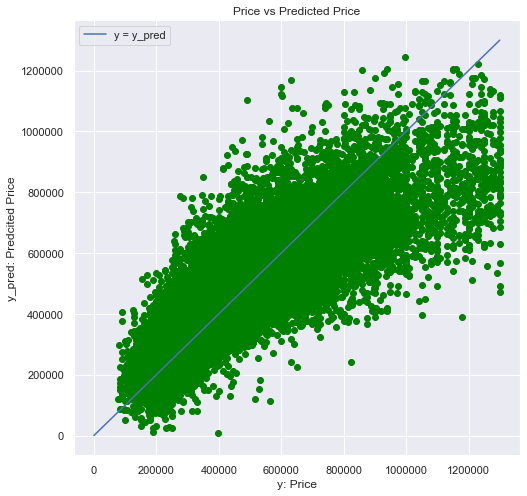

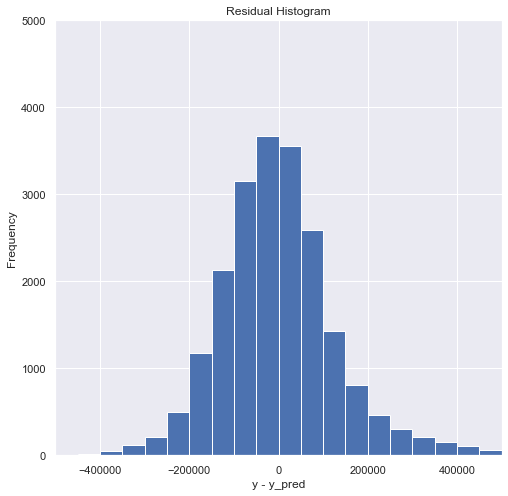

In [195]:
plot_residuals()

In [197]:
mars1_r.fit(X,y)
print(mars1_r.summary())
print(mars1_r.summary_feature_importances(sort_by='nb_subsets'))

Earth Model
------------------------------------------
Basis Function       Pruned  Coefficient  
------------------------------------------
(Intercept)          No      4.49144e+07  
h(sqft_living-4980)  No      -351.583     
h(4980-sqft_living)  Yes     None         
h(lat-47.2989)       No      637103       
h(47.2989-lat)       No      -232920      
view                 No      50858.1      
h(sqft_lot-8821)     No      29.1413      
h(8821-sqft_lot)     Yes     None         
yr_built             No      -1326.01     
sqft_above           No      65.1001      
condition            No      26236.1      
zipcode              No      -424.771     
bedrooms             No      -20905.5     
h(bathrooms-5.25)    No      -189303      
h(5.25-bathrooms)    No      -30267.4     
h(long+121.402)      No      -2.2266e+06  
h(-121.402-long)     No      94842.4      
h(sqft_lot-10608)    No      -29.0149     
h(10608-sqft_lot)    No      14.5442      
waterfront           No      148368       

### MARS with two DoF (with all features and price range below 1.3mln)


In [198]:
#All features
used_cols = [c for c in df_adj.columns.tolist() if c not in ['price']]
X, y = df_adj[used_cols], df_adj['price']

------------------------------------------------------------
test_r2 :
					 0.7941 +/- 0.0153
test_neg_mean_absolute_error :
					 -75204.5933 +/- 3449.7901

------------------------------------------------------------
test_neg_mean_squared_error :
					 -10756185635.9203 +/- 863595057.0135


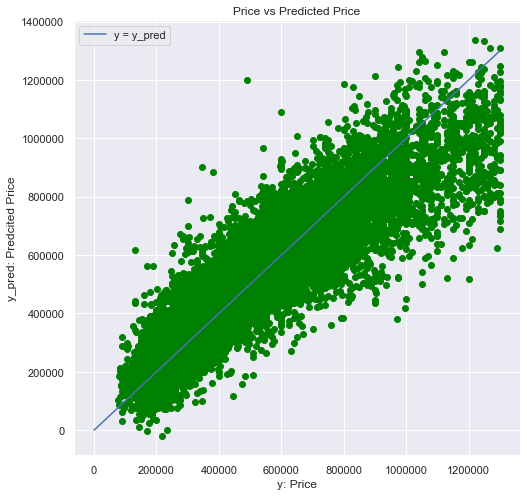

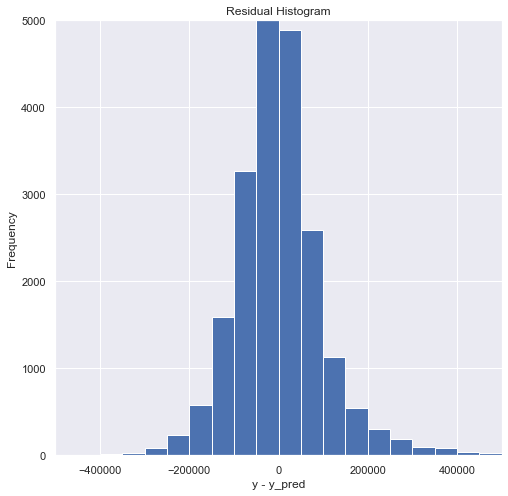

In [201]:
mars2 = Earth(max_degree=2,
             feature_importance_type=criteria)
pipe_mars2 = make_pipeline(scaler, mars2)
pipe_mars2 = model_evaluate(pipe_mars2, bagging=False)
y_pred = model_predict(pipe_mars2)
plot_residuals()

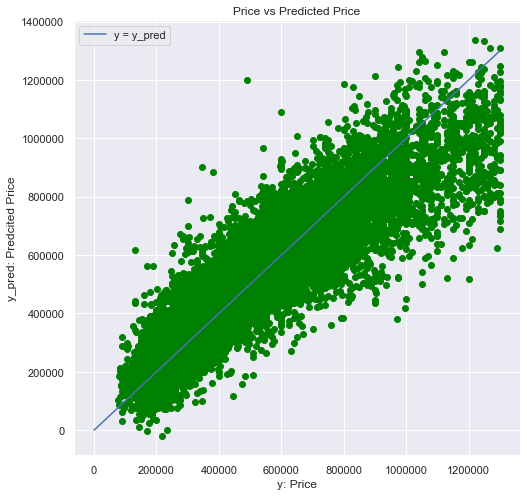

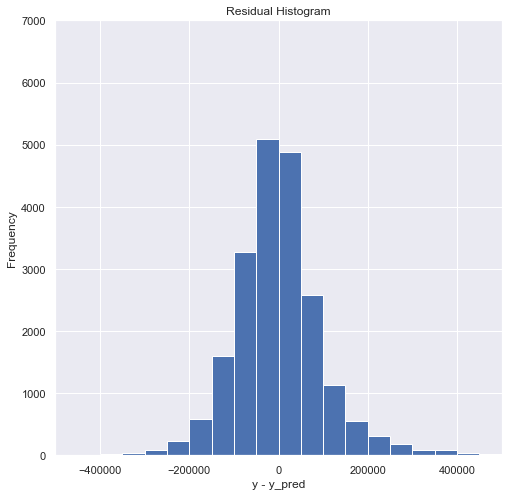

In [203]:
    SIZE = (8,8)
    
    # plot y vs y_pred
    plt.figure(figsize=SIZE)
    plt.scatter(y,y_pred, color = 'green')
    plt.plot([0, y.max()],[0,y.max()], label = 'y = y_pred')
    plt.legend()
    plt.xlabel('y: Price')
    plt.ylabel('y_pred: Predcited Price')
    plt.title('Price vs Predicted Price')
    plt.show()
    
    #  plot residual histogram
    plt.figure(figsize=SIZE)
    plt.hist(y - y_pred, histtype = 'bar', range = (-500000, 500000),bins = 20)
    
    plt.ylim(0,7000)
    plt.xlim(-500000, 500000)
    plt.xlabel('y - y_pred')
    plt.ylabel('Frequency')
    plt.title('Residual Histogram')
    plt.show()

In [202]:
mars2.fit(X,y)
print(mars2.summary())
print(mars2.summary_feature_importances(sort_by='nb_subsets'))

Earth Model
------------------------------------------------------------
Basis Function                         Pruned  Coefficient  
------------------------------------------------------------
(Intercept)                            No      3.86552e+07  
grade                                  Yes     None         
h(lat-47.2416)*grade                   No      125077       
h(47.2416-lat)*grade                   Yes     None         
h(sqft_living-4980)*grade              Yes     None         
h(4980-sqft_living)*grade              No      -21.1416     
yr_built*grade                         No      45.5766      
view                                   No      31415.6      
h(sqft_lot-8821)*grade                 No      0.0247541    
h(8821-sqft_lot)*grade                 Yes     None         
sqft_living15                          No      2005.06      
condition*sqft_living15                No      16.6974      
zipcode                                Yes     None         
yr_built*sqf

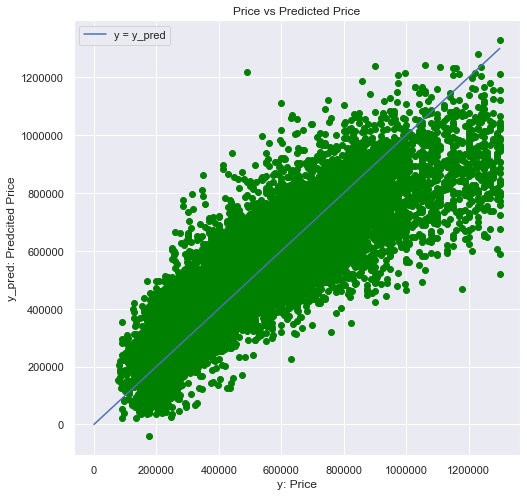

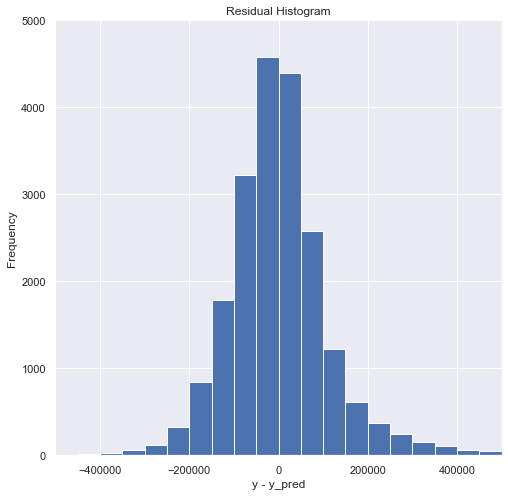

In [215]:
plot_residuals()

### MARS with two DoF (with reduced features and price range below 1.3mln)


In [204]:
#lets use used_cols_reduced with some of the features dropped
used_cols = used_cols_red
X, y = df_adj[used_cols], df_adj['price']

In [206]:
mars2r = Earth(max_degree=2,
             feature_importance_type=criteria)
pipe_mars2r = make_pipeline(scaler, mars2r)
pipe_mars2r = model_evaluate(pipe_mars2r, bagging=False)
y_pred = model_predict(pipe_mars2r)

------------------------------------------------------------
test_r2 :
					 0.7337 +/- 0.0144
test_neg_mean_absolute_error :
					 -85860.0729 +/- 3537.2591

------------------------------------------------------------
test_neg_mean_squared_error :
					 -13911703143.6863 +/- 856721739.0265


In [ ]:
mars2r.fit(X,y)
print(mars2r.summary())
print(mars2r.summary_feature_importances(sort_by='nb_subsets'))

### GAM with all features and price range below 1.3mln

In [216]:
#All features
used_cols = [c for c in df_adj.columns.tolist() if c not in ['price']]
X, y = df_adj[used_cols], df_adj['price']

In [218]:
gam = LinearGAM(n_splines=25)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:01:01 Time:  0:01:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    255.8876
Link Function:                     IdentityLink Log Likelihood:                               -496302.8931
Number of Samples:                        20822 AIC:                                           993119.5613
                                                AICc:                                          993126.0043
                                                GCV:                                       9167314845.7539
                                                Scale:                                     8964751527.1642
                                                Pseudo R-Squared:                                   0.8307
Feature Function                  Lam

In [239]:
# ## plotting
# N = len(used_cols[:])
# fig, axs = plt.subplots(1,N,figsize=(N*5,5))

# titles = used_cols[:]
# for i, ax in enumerate(axs):
#     XX = gam.generate_X_grid(term=i)
#     ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
#     ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
#     ax.set_title(titles[i]);
# fig.tight_layout()
# fig.show()

In [226]:
y_pred = model_predict([gam])

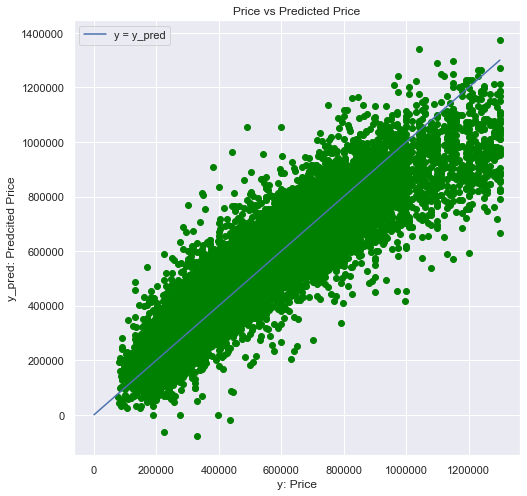

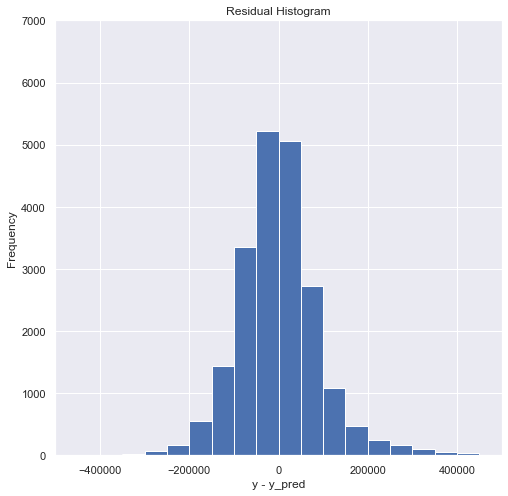

In [227]:
plot_residuals()

In [234]:
print('Metrics:')
print("R2:", r2_score(y, y_pred))
print("Mean absolute error:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
    

Metrics:
R2: 0.8306778675560438
Mean absolute error: 68143.4916811582
RMSE: 94098.78378892763


### GAM with reduced features and price range below 1.3mln

In [237]:
#lets use used_cols_reduced with some of the features dropped
used_cols = used_cols_red
X, y = df_adj[used_cols], df_adj['price']

In [238]:
gam = LinearGAM(n_splines=25)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:47 Time:  0:00:47


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    221.7585
Link Function:                     IdentityLink Log Likelihood:                               -499560.7389
Number of Samples:                        20822 AIC:                                           999566.9949
                                                AICc:                                          999571.8345
                                                GCV:                                       10687778981.804
                                                Scale:                                    10483086412.5872
                                                Pseudo R-Squared:                                   0.8017
Feature Function                  Lam

In [240]:
# ## plotting
# N = len(used_cols[:])
# fig, axs = plt.subplots(1,N,figsize=(N*5,5))

# titles = used_cols[:]
# for i, ax in enumerate(axs):
#     XX = gam.generate_X_grid(term=i)
#     ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
#     ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
#     ax.set_title(titles[i]);
# fig.tight_layout()
# fig.show()

In [241]:
y_pred = model_predict([gam])

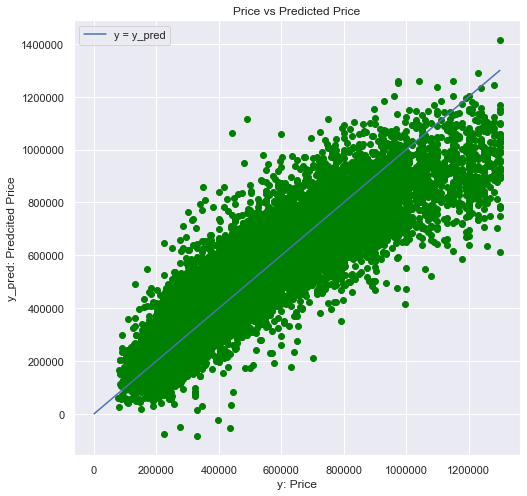

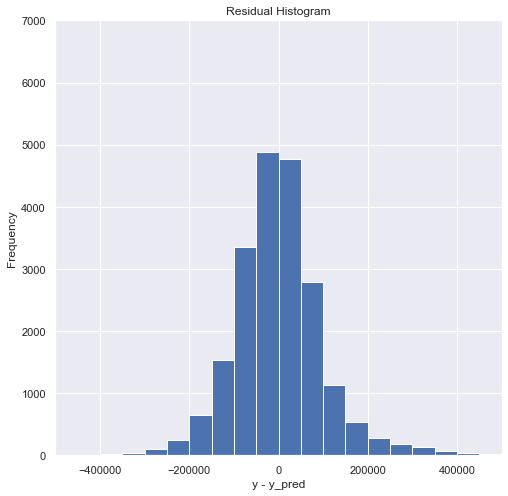

In [242]:
plot_residuals()

In [243]:
print('Metrics:')
print("R2:", r2_score(y, y_pred))
print("Mean absolute error:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

Metrics:
R2: 0.8016716751723161
Mean absolute error: 73671.18037345562
RMSE: 101840.2642260673


### GAM - 2 with all features and price range below 1.3mln with tensors

In [281]:
#All features
used_cols = [c for c in df_adj.columns.tolist() if c not in ['price']]
X, y = df_adj[used_cols], df_adj['price']

In [263]:
print(used_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sale', 'month_sale']


In [264]:
# DEFINE TERMS:
#   * splines - for continuous
#   * factors - for categorical/discrete 
#        (assumption: label encoded w/ 0 to level_size-1)
#   * tensors - for any interactions

# create the term list
term_list = []
for i, col in enumerate(used_cols):
    term_list.append(spline(i))

# add the x1 and x2 interaction term
term_list.append(tensor(13, 14)) # longitude and latitude

# create the terms and model
terms = np.sum(term_list)
print(terms)

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + te(13, 14)


In [265]:
gam = GAM(distribution='gamma', link='log', terms=terms)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:01:43 Time:  0:01:43


GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    270.0155
Link Function:                          LogLink Log Likelihood:                               -262243.3572
Number of Samples:                        20822 AIC:                                           525028.7455
                                                AICc:                                          525035.9202
                                                GCV:                                                 0.027
                                                Scale:                                              0.0264
                                                Pseudo R-Squared:                                    0.876
Feature Function                  Lam

In [266]:
y_pred = model_predict([gam])

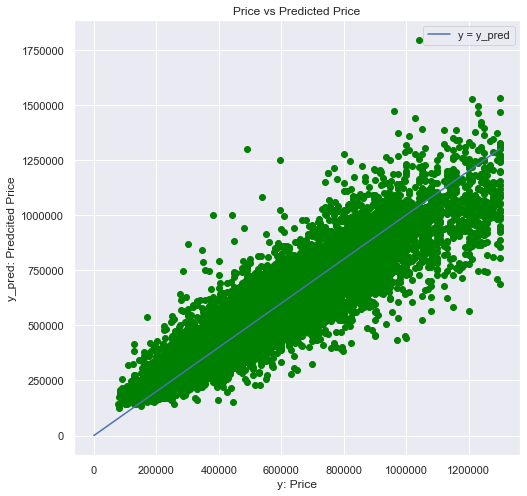

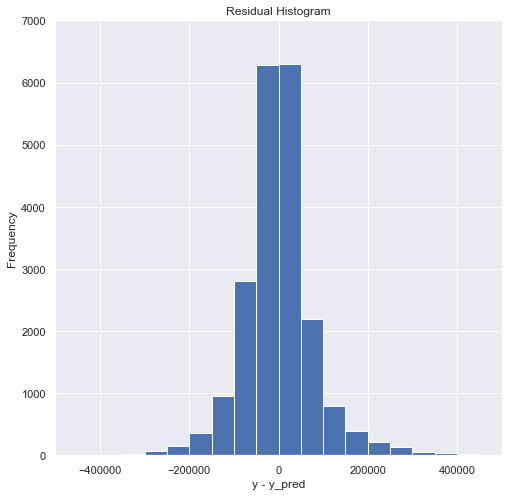

In [267]:
plot_residuals()

In [268]:
print('Metrics:')
print("R2:", r2_score(y, y_pred))
print("Mean absolute error:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

Metrics:
R2: 0.8679387244988974
Mean absolute error: 56504.53882755476
RMSE: 83102.65315276093


### GAM - 2 with all features and price range below 1.3mln with tensors

In [269]:
print(used_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sale', 'month_sale']


In [272]:
# DEFINE TERMS:
#   * splines - for continuous
#   * factors - for categorical/discrete 
#        (assumption: label encoded w/ 0 to level_size-1)
#   * tensors - for any interactions

# create the term list
term_list = []
for i, col in enumerate(used_cols):
    term_list.append(spline(i))

# add the x1 and x2 interaction term
term_list.append(tensor(13, 14)) # longitude and latitude
term_list.append(tensor(2, 9))
term_list.append(tensor(2, 10))
term_list.append(tensor(7, 8))

term_list.append(tensor(-1, -2))
# create the terms and model
terms = np.sum(term_list)
print(terms)

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + te(13, 14) + te(2, 9) + te(2, 10) + te(7, 8) + te(-1, -2)


In [273]:
gam = GAM(distribution='gamma', link='log', terms=terms)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:05:40 Time:  0:05:40


GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    332.9649
Link Function:                          LogLink Log Likelihood:                               -262174.1222
Number of Samples:                        20822 AIC:                                           525016.1742
                                                AICc:                                          525027.0949
                                                GCV:                                                 0.027
                                                Scale:                                              0.0263
                                                Pseudo R-Squared:                                   0.8769
Feature Function                  Lam

In [274]:
y_pred = model_predict([gam])

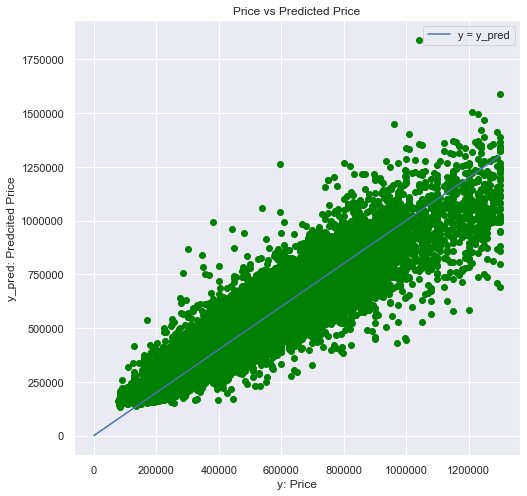

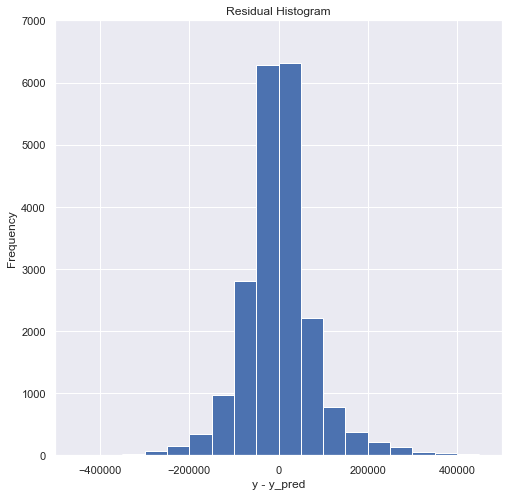

In [275]:
plot_residuals()

In [276]:
print('Metrics:')
print("R2:", r2_score(y, y_pred))
print("Mean absolute error:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

Metrics:
R2: 0.8697810468127047
Mean absolute error: 56232.75951712997
RMSE: 82520.9550307161


### GAM - 2 with reduced features and price range below 1.3mln with tensors

In [282]:
#lets use used_cols_reduced with some of the features dropped
used_cols = used_cols_red
X, y = df_adj[used_cols], df_adj['price']

In [287]:
# used_cols[12:14]

In [288]:
# DEFINE TERMS:
#   * splines - for continuous
#   * factors - for categorical/discrete 
#        (assumption: label encoded w/ 0 to level_size-1)
#   * tensors - for any interactions

# create the term list
term_list = []
for i, col in enumerate(used_cols):
    term_list.append(spline(i))

# add the x1 and x2 interaction term
term_list.append(tensor(12, 13)) # longitude and latitude

# create the terms and model
terms = np.sum(term_list)
print(terms)

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + te(12, 13)


In [289]:
gam = GAM(distribution='gamma', link='log', terms=terms)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:01:18 Time:  0:01:18


GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    229.9299
Link Function:                          LogLink Log Likelihood:                               -263584.1647
Number of Samples:                        20822 AIC:                                           527630.1892
                                                AICc:                                          527635.3916
                                                GCV:                                                0.0305
                                                Scale:                                                0.03
                                                Pseudo R-Squared:                                   0.8591
Feature Function                  Lam

In [290]:
y_pred = model_predict([gam])

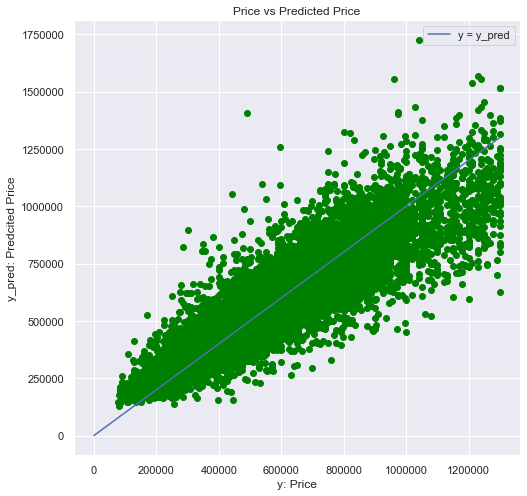

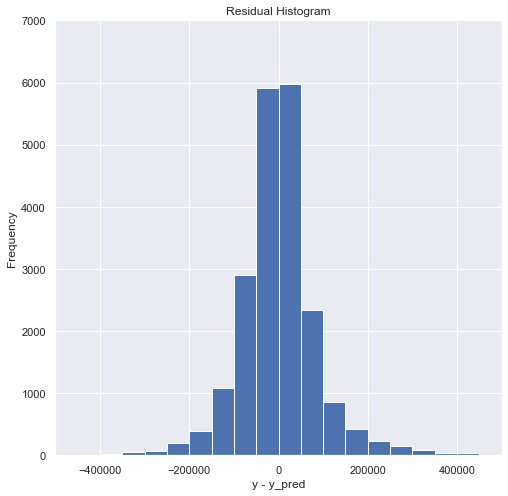

In [291]:
plot_residuals()

In [292]:
print('Metrics:')
print("R2:", r2_score(y, y_pred))
print("Mean absolute error:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

Metrics:
R2: 0.8441657575485169
Mean absolute error: 61445.02546461743
RMSE: 90273.14909148273


### GAM - 2 with full features and all price range with tensors

In [294]:
#All features
used_cols = [c for c in df.columns.tolist() if c not in ['price']]
X, y = df[used_cols], df['price']

In [296]:
print(used_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sale', 'month_sale']


In [297]:
# DEFINE TERMS:
#   * splines - for continuous
#   * factors - for categorical/discrete 
#        (assumption: label encoded w/ 0 to level_size-1)
#   * tensors - for any interactions

# create the term list
term_list = []
for i, col in enumerate(used_cols):
    term_list.append(spline(i))

# add the x1 and x2 interaction term
term_list.append(tensor(13, 14)) # longitude and latitude
term_list.append(tensor(2, 9))
term_list.append(tensor(2, 10))
term_list.append(tensor(7, 8))

term_list.append(tensor(-1, -2))
# create the terms and model
terms = np.sum(term_list)
print(terms)

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + te(13, 14) + te(2, 9) + te(2, 10) + te(7, 8) + te(-1, -2)


In [298]:
gam = GAM(distribution='gamma', link='log', terms=terms)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:05:37 Time:  0:05:37


GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    314.1147
Link Function:                          LogLink Log Likelihood:                               -273794.7322
Number of Samples:                        21596 AIC:                                           548219.6939
                                                AICc:                                           548229.056
                                                GCV:                                                 0.029
                                                Scale:                                              0.0284
                                                Pseudo R-Squared:                                   0.9084
Feature Function                  Lam

In [299]:
y_pred = model_predict([gam])

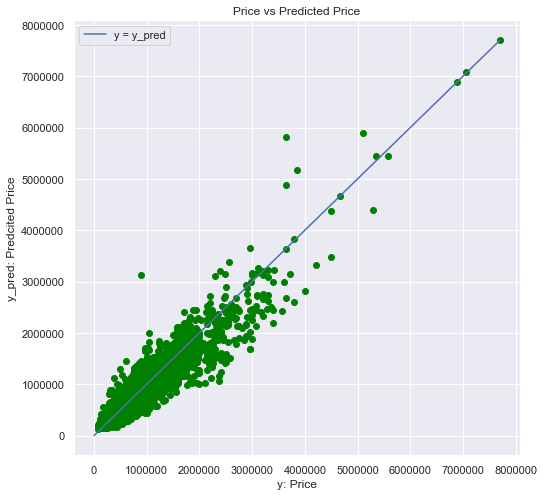

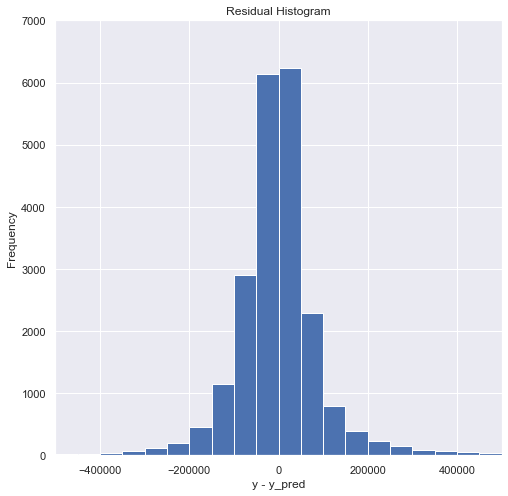

In [300]:
plot_residuals()

In [301]:
print('Metrics:')
print("R2:", r2_score(y, y_pred))
print("Mean absolute error:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

Metrics:
R2: 0.9009850266700109
Mean absolute error: 67629.99702626409
RMSE: 115598.23051138442
